# SpeedUp

Midiendo la diferencia entre el serial y los paralelizados con MPI

In [11]:
import time
import sys

import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Archivo de configuración para medir los tiempos
# Solo se varia la cantidad de excitaciones

def experient_conf(num_exc):
    conf = """r_mean = 15
    R_Forster = 3.14
    mean_path = 100
    tau_D = 0.333
    epsilon = 1.5

    num_acceptors_min = 0
    num_acceptors_max = 501
    acceptors_step = 20

    arbitrary_list = 1 #Para una lista arbitraria (if == 1, use list)
    list_num_acceptors = 0, 21, 43, 86, 171, 436, 871

    num_exc = %i

    acceptors = vol
    exiton = laser
    r_electro = 0""" %num_exc

    conf_file = open('speed.conf', 'w')
    conf_file.write(conf)
    conf_file.close

In [3]:
# Medición de los tiempos

serial_time = []
parallel2 = []
parallel4 = []

x = np.array([i for i in range(1000, 15001, 1000)])

for num_exc in x:
    
    experient_conf(num_exc)
    
    out = !python3 ../main.py -c speed.conf -o ../output/ -v
    ext, text = out[0].split(':')
    time, ext = text.split('seg')
    serial_time.append(float(time))

    out = !mpirun -n 2 python3 ../parallelized_main.py -c speed.conf -o ../output/ -v
    ext, text = out[0].split(':')
    time, ext = text.split('seg')
    parallel2.append(float(time))
    
    out = !mpirun -n 4 python3 ../parallelized_main.py -c speed.conf -o ../output/ -v
    ext, text = out[0].split(':')
    time, ext = text.split('seg')
    parallel4.append(float(time))
    
    sys.stdout.write('\r Termino la simulación con {0} exitaciones'.format(num_exc) )

 Termino la simulación con 15000 exitaciones

In [17]:
serial_time, parallel2, parallel4

([66.372, 78.834], [39.297, 43.211], [38.899, 45.265])

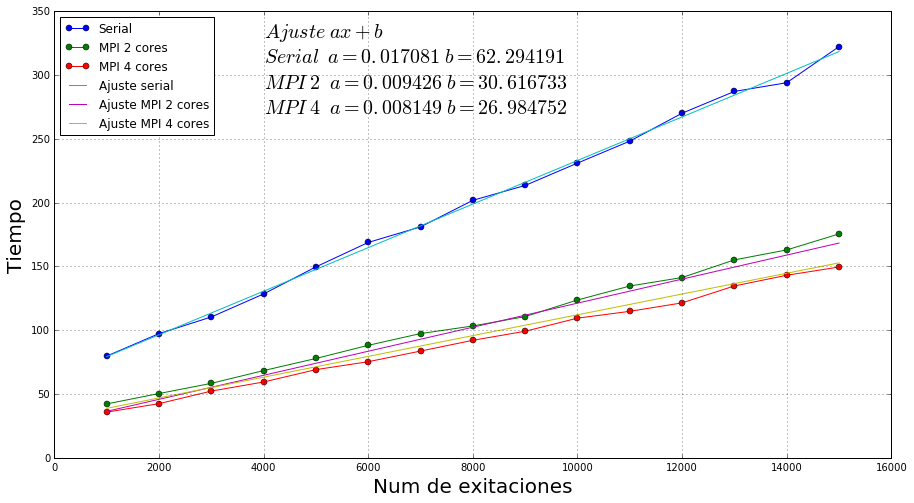

In [21]:
# Función con la cual voy a realizar el ajuste
def func(x, a, b):
    return a*x + b

popt_serial, pcov_serial = curve_fit(func, x, serial_time)
popt_mpi2, pcov_serial = curve_fit(func, x, parallel2)
popt_mpi4, pcov_serial = curve_fit(func, x, parallel4)

plt.figure(figsize=(15, 8))
plt.plot(x, serial_time, '-o')
plt.plot(x, parallel2, '-o')
plt.plot(x, parallel4, '-o')
plt.plot(x, func(x, popt_serial[0], popt_serial[1]))
plt.plot(x, func(x, popt_mpi2[0], popt_mpi4[1]))
plt.plot(x, func(x, popt_mpi4[0], popt_mpi2[1]))
plt.xlabel('Num de exitaciones', fontsize=20)
plt.ylabel('Tiempo', fontsize=20)
plt.legend(['Serial', 'MPI 2 cores', 'MPI 4 cores', 'Ajuste serial', 'Ajuste MPI 2 cores', 'Ajuste MPI 4 cores'], loc=0)
plt.text(4000, 330, r'$Ajuste\; ax+ b$', fontsize=20)
plt.text(4000, 310, r'$Serial\;\; a = %f\; b = %f$' %(popt_serial[0], popt_serial[1]), fontsize=20)
plt.text(4000, 290, r'$MPI\; 2\;\; a = %f\; b = %f$' %(popt_mpi2[0], popt_mpi2[1]), fontsize=20)
plt.text(4000, 270, r'$MPI\; 4\;\; a = %f\; b = %f$' %(popt_mpi4[0], popt_mpi4[1]), fontsize=20)
plt.grid()
plt.show()

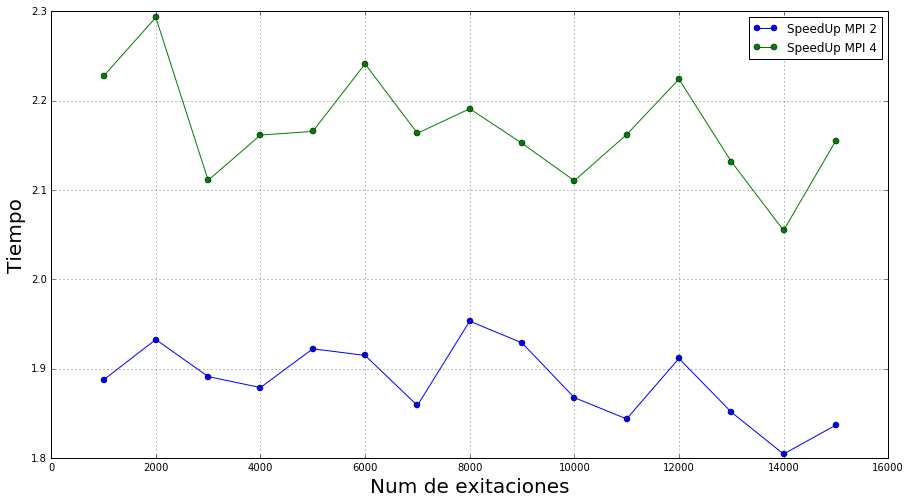

In [23]:
mpi2 = np.array(parallel2)
mpi4 = np.array(parallel4)
serial = np.array(serial_time)

plt.figure(figsize=(15, 8))
plt.plot(x, serial/mpi2, '-o')
plt.plot(x, serial/mpi4, '-o')
plt.xlabel('Num de exitaciones', fontsize=20)
plt.ylabel('Tiempo', fontsize=20)
plt.legend(['SpeedUp MPI 2', 'SpeedUp MPI 4'], loc=0)
plt.grid()
plt.show()

In [1]:
#Este css esta basado en el de @LorenaABarba y su grupo
from IPython.core.display import HTML
css_file = 'css/personal.css'
HTML(open(css_file, "r").read())

##### Licencia
El código esta licenciado bajo MIT.

La documentación bajo:

<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">TEN</span> by <span xmlns:cc="http://creativecommons.org/ns#" property="cc:attributionName">Laboratorio de Microscopia Óptica Avanzada - UNRC</span> is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a>.<br />Based on a work at <a xmlns:dct="http://purl.org/dc/terms/" href="https://github.com/pewen/ten" rel="dct:source">https://github.com/pewen/ten</a>